In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tqdm
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict

In [3]:
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

from nba_api.stats.endpoints.playbyplay import PlayByPlay
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

from nba_api.stats.endpoints.leaguedashteamshotlocations import LeagueDashTeamShotLocations
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot

from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

from nba_api.stats.endpoints.leaguehustlestatsplayer import LeagueHustleStatsPlayer
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats

In [4]:
seasons = [f"{item}-{str(item+1)[-2:]}" for item in range(2000, 2021)]

In [5]:
seasons

['2000-01',
 '2001-02',
 '2002-03',
 '2003-04',
 '2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',
 '2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17',
 '2017-18',
 '2018-19',
 '2019-20',
 '2020-21']

In [8]:
data = []
away = []
for season in seasons:
    df = LeagueDashTeamStats(season=season, per_mode_detailed='PerGame').get_data_frames()[0]
    df.loc[:, 'SEASON'] = season
    data.append(df)
    time.sleep(0.25)
    away_df = LeagueDashTeamStats(season=season, per_mode_detailed='PerGame', location_nullable='Road').get_data_frames()[0]
    away_df.loc[:, 'SEASON'] = season
    away.append(away_df)
    time.sleep(0.25)

In [9]:
concated_df = pd.concat(data)

In [10]:
concated_away = pd.concat(away)

In [26]:
total_pcts = []
away_pcts = []
for season in seasons:
    target_total = concated_df.loc[concated_df.SEASON == season]
    total_pcts.append(target_total.FG3M.sum() / target_total.FG3A.sum() * 100)
    target_away = concated_away.loc[concated_away.SEASON == season]
    away_pcts.append(target_away.FG3M.sum() / target_away.FG3A.sum() * 100)

In [29]:
plt.style.use('fivethirtyeight')

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


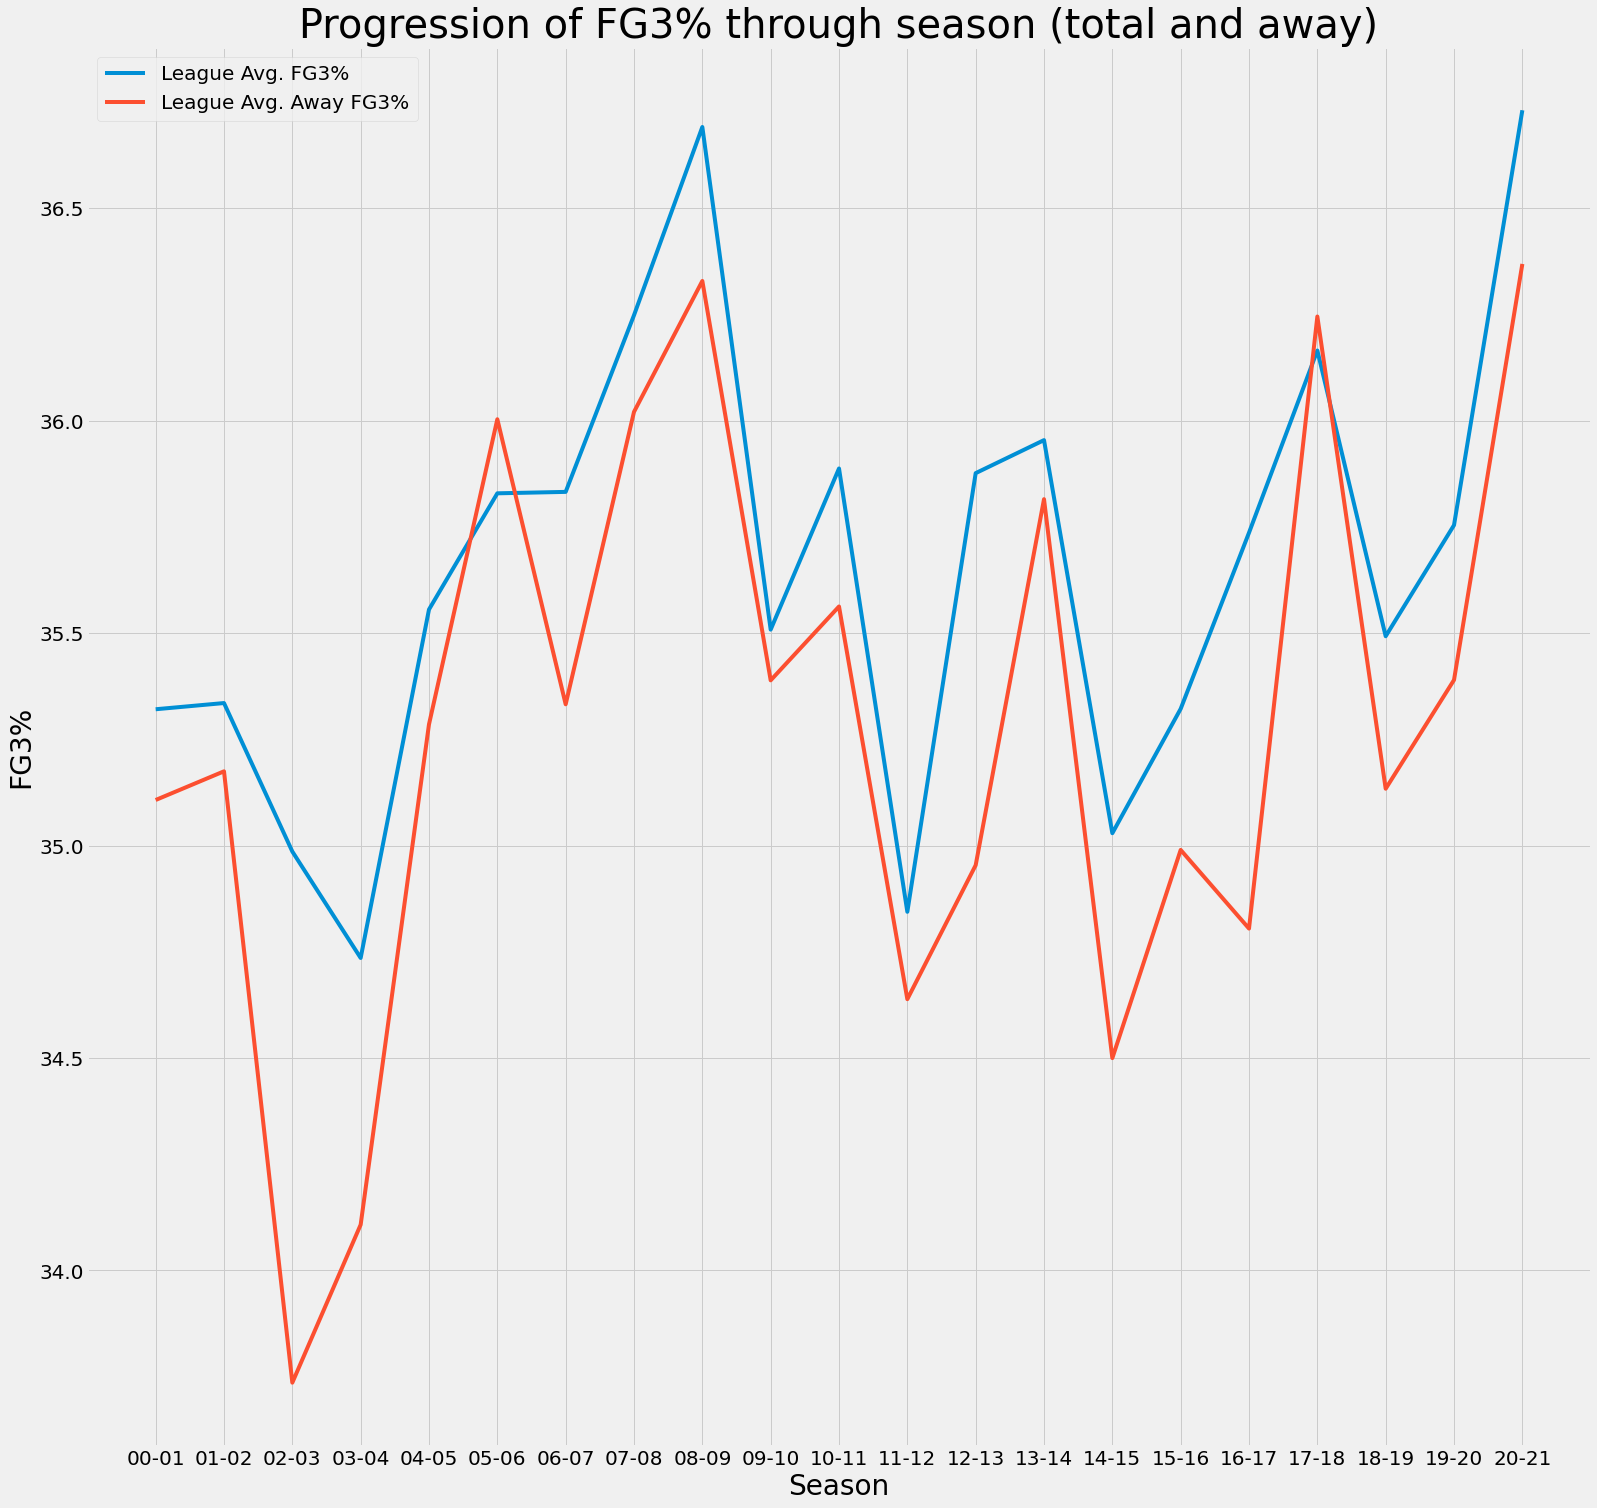

In [38]:
fig, ax = plt.subplots(figsize=(24, 24))

size = 28

ax.plot(seasons, total_pcts, label="League Avg. FG3%")
ax.plot(seasons, away_pcts, label="League Avg. Away FG3%")

ax.set_xticklabels(item[2:] for item in seasons)
ax.set_xlabel("Season", size=size)
ax.set_ylabel("FG3%", size=size)
ax.set_title("Progression of FG3% through season (total and away)", size=size+12)
ax.tick_params(labelsize=size-8)
ax.legend(fontsize=size-8)